# ICU SURVIVAL PREDICTION: Data Wrangling and Analysis

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#conclusions">Summary</a></li>
</ul>


 <a name = "intro"></a>
>## 1. Introduction
> The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival.  MIT's GOSSIS community initiative, with privacy certification from the Harvard Privacy Lab, has provided a dataset of more than  90000 hospital Intensive Care Unit (ICU) visits from patients, spanning a one-year timeframe. This data is part of a growing global effort and consortium spanning Argentina, Australia, New Zealand, Sri Lanka, Brazil, and more than 200 hospitals in the United States. datset can be found here

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
#Reads both data and data dictionary into a pandas dataframe
df = pd.read_csv('../Datasets/dataset.csv')
df_col_description = pd.read_csv('../Datasets/Data Dictionary.csv')

In [37]:
df.head(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0


In [38]:
df.tail(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
91712,1671,53612,104,82.0,22.031250,1,Caucasian,F,160.0,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,NaN,0


In [39]:
#rows and columns
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 91713
number of columns are: 85


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [41]:
#Column key
df_col_description.head(3)

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None


<a name = "wrangling"></a>
##  2. Data Wrangling

In [42]:
print(f'They are {df.duplicated().sum()} duplicates in the dataset') 

They are 0 duplicates in the dataset


In [43]:
#inhibit Truncation of data on both rows and colums
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None) 

In [1]:
df.isnull().sum() #sum of nan by columns

NameError: name 'df' is not defined

They are columns in the datasets that are not relevant to the analysis and need to be droped. These columns are ``` 'encounter_id', 'patient_id', 'hospital_id','Unnamed: 83',``` and ```'icu_id' ``` and may affect the final model accurracy of the final.

In [45]:
#drops the above column list as it will have no effect on the project
columns=['encounter_id', 'patient_id', 'hospital_id','Unnamed: 83','icu_id']
for i in columns:
    df=df.drop(i, axis=1)

In [46]:
columns=['age','bmi','height','weight','resprate_apache','map_apache','d1_diasbp_noninvasive_max']
for i in columns:
    df[i]=df[i].fillna(round(df[i].mean())) #fill the nan in the above columns with columns mean

In [47]:
# CCU-CTICU Cardiac ICU CSICU CTICU all represent icu unit that takes care of heart related problems
df['icu_type']=df['icu_type'].str.replace('C.*ICU','Cardiac ICU', regex=True)

In [48]:
# convert all rating_denominator greater than 10 to 10
df['pre_icu_los_days']=df['pre_icu_los_days'].mask(df['pre_icu_los_days']<0, 0)

In [49]:
#drop nan values in the below subset
df=df.dropna(subset=['ethnicity','gender','icu_admit_source','apache_2_diagnosis',
                     'apache_3j_diagnosis','gcs_eyes_apache','apache_4a_hospital_death_prob',
                    'd1_potassium_min','h1_mbp_noninvasive_min','temp_apache','h1_resprate_max',
                    'd1_glucose_max','d1_spo2_max','h1_spo2_max','h1_diasbp_max','h1_sysbp_noninvasive_max',
                    'h1_heartrate_max','d1_temp_max','d1_temp_min'])

In [50]:
#rows and columns
print(f'After handling missing value they are {df.shape[0]} row and {df.shape[1]} columns left')

After handling missing value they are 61144 row and 80 columns left


<a name = "eda"></a>
## 3. Exploratory Data Analysis

### 3.1 Percentage Representation of hospital_death

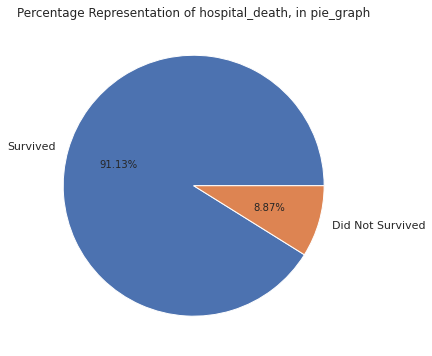

In [51]:
# Pie plot of ICU types
hospital_death = df['hospital_death'].value_counts().sort_values(ascending=False)
plt.figure(figsize = (6,6))
plt.title('Percentage Representation of hospital_death, in pie_graph')
plt.pie(hospital_death, labels = ['Survived','Did Not Survived'], autopct = '%1.2f%%');

- The target feature (hospital_death) is highly imbalance with with a ```91%``` survival rate and ```9%``` non survival

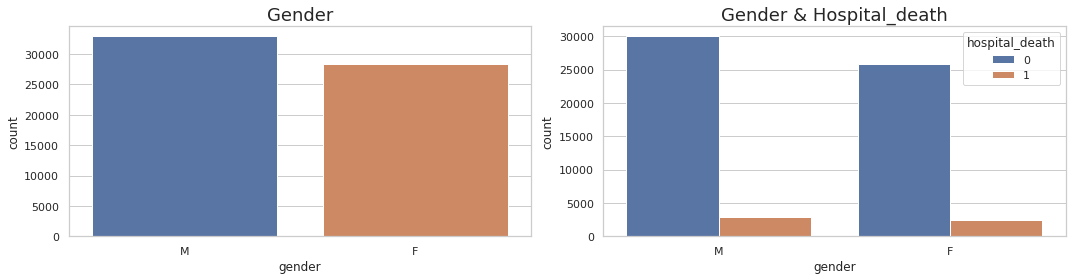

In [52]:
plt.figure(figsize=(15,4))
ax1=plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df, ax=ax1) #count plot of target feature
plt.title('Gender',fontsize=18)

ax2=plt.subplot(1, 2, 2)
sns.countplot(x='gender', hue='hospital_death', data=df,ax=ax2) #count plot of target feature
plt.title('Gender & Hospital_death',fontsize=18)
plt.tight_layout()
plt.show()

- In the data set, there are ```41898 male``` and ```35746 female``` 
- They are ```32817 female``` and  ```38423 male``` who suvrived while ```3129 female``` and ```3475 male``` did not.

In [53]:
round(df.describe(),2)

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,...,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00,61144.00
mean,62.53,29.10,0.16,169.57,0.82,83.77,181.50,543.84,0.18,0.03,...,0.06,0.00,0.02,0.23,0.01,0.03,0.01,0.00,0.02,0.09
std,16.32,8.14,0.36,10.75,2.40,24.77,85.56,449.30,0.38,0.17,...,0.19,0.03,0.13,0.42,0.12,0.17,0.09,0.06,0.15,0.28
min,16.00,14.84,0.00,137.20,0.00,38.60,101.00,101.01,0.00,0.00,...,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,53.00,23.69,0.00,162.50,0.03,66.80,113.00,204.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,64.00,27.85,0.00,170.00,0.14,80.70,122.00,409.02,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,75.00,32.62,0.00,177.80,0.39,96.10,301.00,703.03,0.00,0.00,...,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,89.00,67.81,1.00,195.59,73.02,186.00,308.00,2201.05,1.00,1.00,...,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


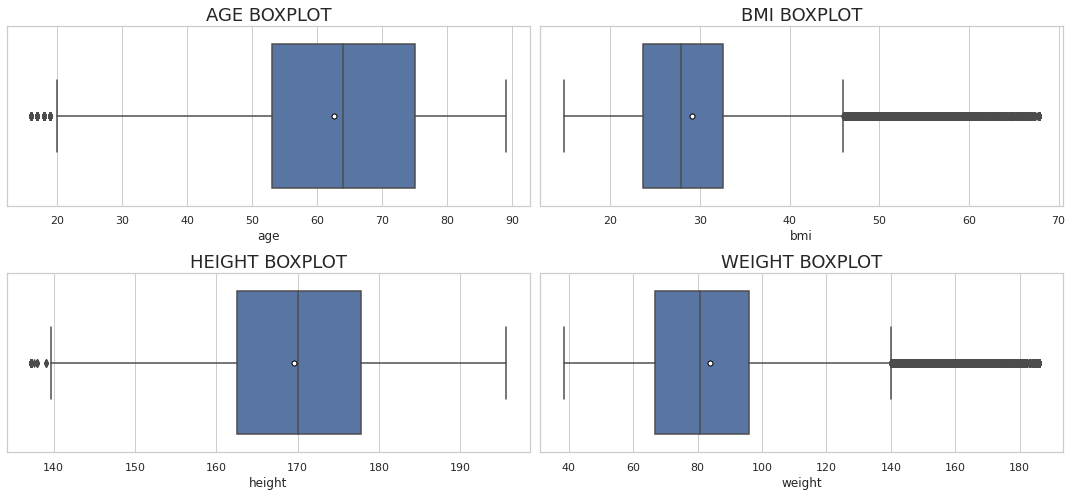

In [54]:
x=['age', 'bmi', 'height', 'weight']
plt.figure(figsize=(15,7))
for i in x:  #boxplot of the above columns in x list
    ax1=plt.subplot(2, 2, x.index(i)+1)
    sns.boxplot(data=df, x=i,ax=ax1, showmeans=True,meanprops={"marker":"o",
                                                               "markerfacecolor":"white",
                                                               "markersize":"5",
                                                                "markeredgecolor":"black"})
    plt.title(f'{i.upper()} BOXPLOT',fontsize=18);
    plt.tight_layout();

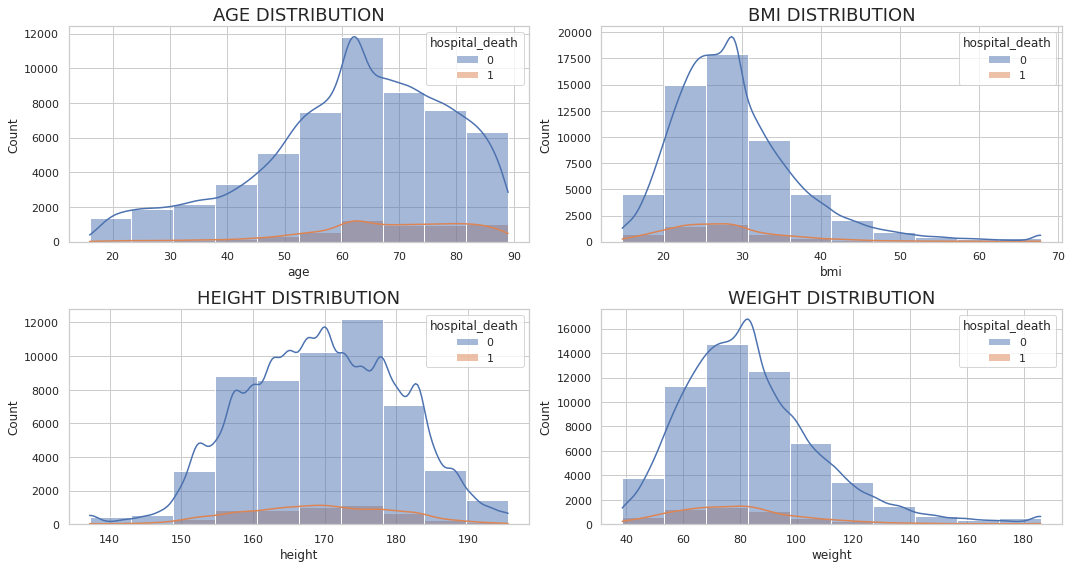

In [55]:
x=['age', 'bmi', 'height', 'weight']
fig=plt.figure(figsize=(15,8))
for i in x:    #Histogram of the columns in x list alonge with kde
    ax1=plt.subplot(2, 2, x.index(i)+1)
    sns.histplot(data=df, x=i, bins=10, kde=True, color = 'navy', hue = 'hospital_death', ax=ax1)
    plt.title(f'{i.upper()} DISTRIBUTION', fontsize=18)
plt.tight_layout();

- From the above box plot Age seems to a little left skewed with few outliers.
- BMI (body max index) and weight  are right skewed with alot of outliers
- Height has normally distribution. 
- The mean ```age```, ```bmi```, ```height``` and ```weight```  are ```62.48```, ```29.15```, ```169.66cm``` and ```83.98kg``` respectively.

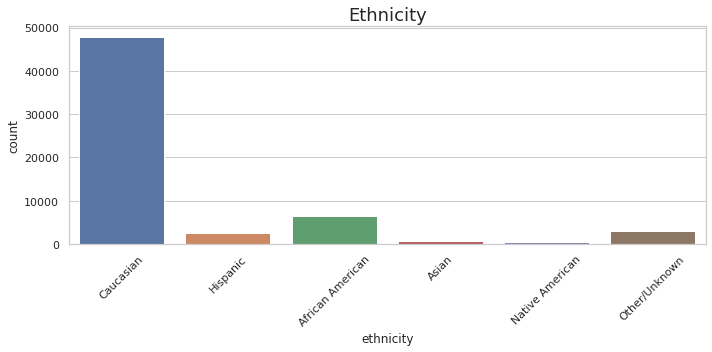

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ethnicity') # Count plot of Ethnicity column
plt.xticks(rotation=45)
plt.title('Ethnicity', fontsize=18)
plt.tight_layout()

- ```Caucasian``` > ```African American``` > ```Hispanic``` > ```Asian``` > ```Native American```
- ```Caucasian``` make ```78%``` of the observation

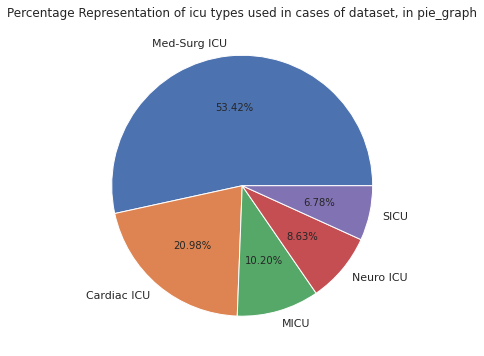

In [57]:
# Pie plot of ICU types
maj_icu = df['icu_type'].value_counts().sort_values(ascending=False)
plt.figure(figsize = (6,6))
plt.title('Percentage Representation of icu types used in cases of dataset, in pie_graph')
plt.pie(maj_icu, labels = maj_icu.index, autopct = '%1.2f%%');

- From the observation ```Med-Surg ICU``` provided the most care accounting for more than 50% of all ICU type.
- ```Cardiac ICU``` accounts for 21% of all ICU type.

In [58]:
apache_3j_death=df.groupby('apache_3j_bodysystem', as_index=False).sum()[['apache_3j_bodysystem','hospital_death']]
apache_3j_death=apache_3j_death.sort_values('hospital_death', ascending=False)

In [59]:
df['apache_2_bodysystem']=df['apache_2_bodysystem'].str.replace('Undefine.*', 'Undefined Diagnoses', regex=True)
apache_2_death=df.groupby('apache_2_bodysystem', as_index=False).sum()[['apache_2_bodysystem','hospital_death']]
apache_2_death=apache_2_death.sort_values('hospital_death', ascending=False)

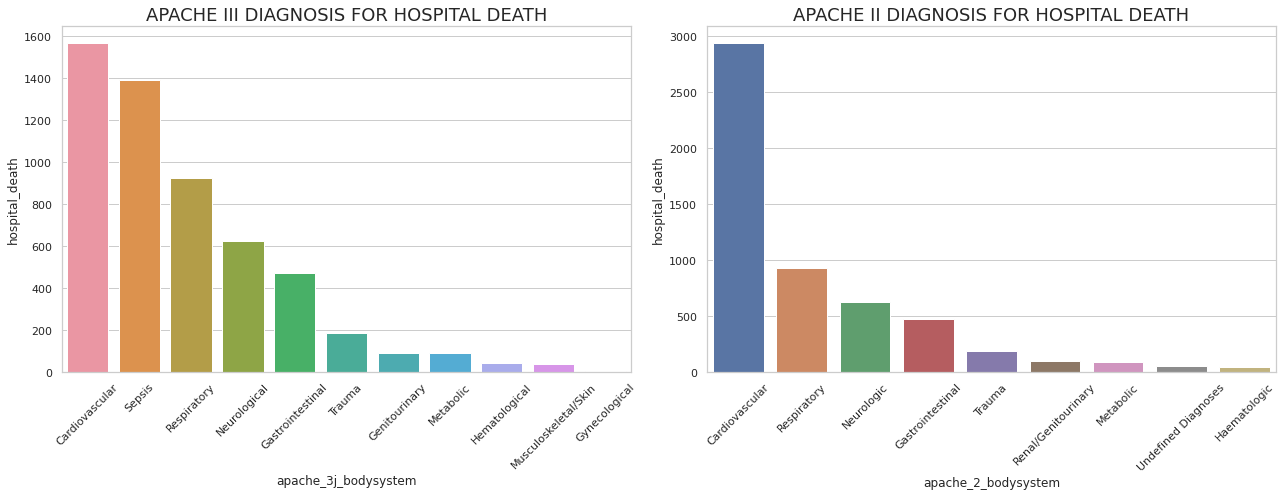

In [60]:
plt.figure(figsize=(18,7))
ax1=plt.subplot(1, 2, 1)
sns.barplot(data=apache_3j_death, x= apache_3j_death['apache_3j_bodysystem'], y=apache_3j_death['hospital_death'], ax=ax1)
plt.xticks(rotation=45)
plt.title('APACHE III DIAGNOSIS FOR HOSPITAL DEATH', fontsize=18);

ax2=plt.subplot(1, 2, 2)
sns.barplot(data=apache_2_death, x= apache_2_death['apache_2_bodysystem'], y=apache_2_death['hospital_death'],ax=ax2)
plt.xticks(rotation=45)
plt.title('APACHE II DIAGNOSIS FOR HOSPITAL DEATH', fontsize=18);
plt.tight_layout()

- In admission diagnosis for both APACHE III and  APACHE II, ```Cardivascular``` disorder have the highest frequency for those who didnt survive
- ```Respiratory``` conditons  comes third in APACHE III after ```Sepsis``` and second in APACHE II
- ```Gynecology``` and ```Heamatologic``` condictions account for least death for both the APACHE III AND APACHE II respectively.

In [61]:
#median is used here as the data is very tailed to the right  and the mean will be greatly affect by outliers
df['pre_icu_los_days'] = df['pre_icu_los_days']*24 # converts to hours
stay=round(df['pre_icu_los_days'].median(),2)
print(f'The average length of stay of the patient between hospital ward admission and unit admission = {stay} hours')

The average length of stay of the patient between hospital ward admission and unit admission = 3.28 hours


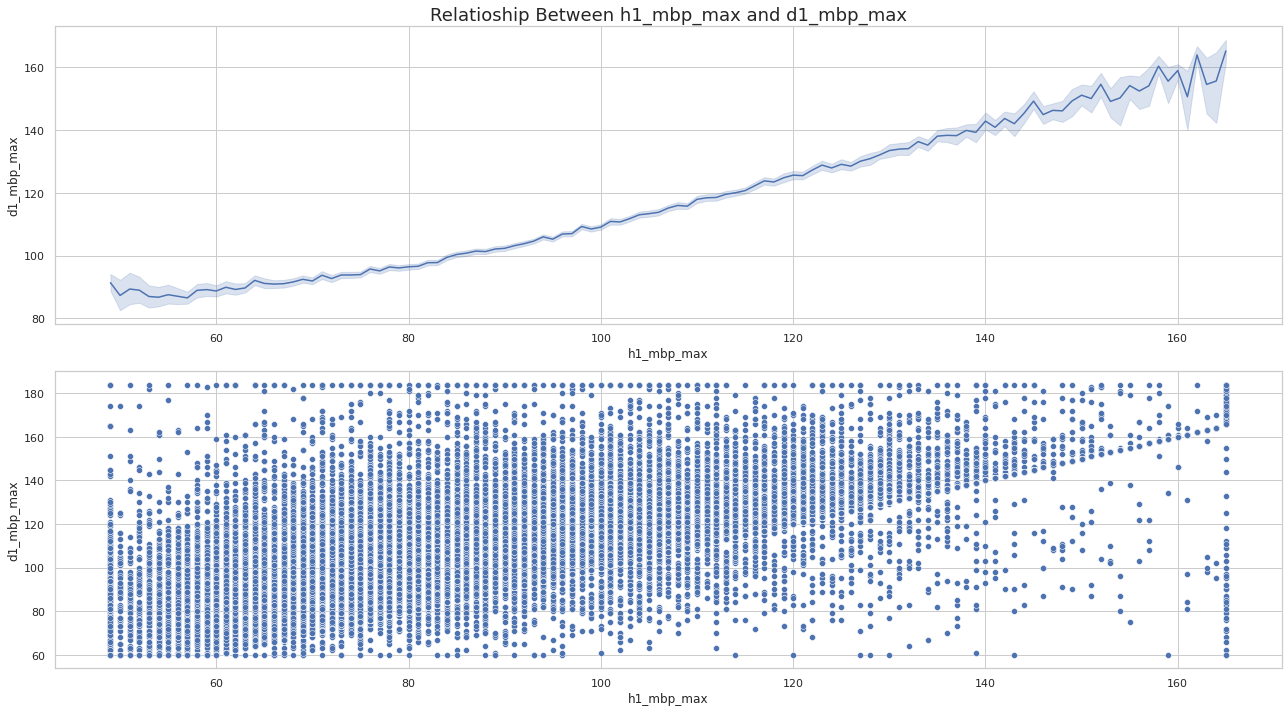

In [62]:
plt.figure(figsize=(18,10))
ax1=plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df['h1_mbp_max'], y=df['d1_mbp_max'], ax=ax1)
plt.title('Relatioship Between h1_mbp_max and d1_mbp_max', fontsize=18)
ax2=plt.subplot(2, 1, 2)
sns.scatterplot(data=df, x=df['h1_mbp_max'], y=df['d1_mbp_max'], ax=ax2)
plt.tight_layout();

- They seem to be correlection between first hour mean blood pressure and 24 hour mean blood pressure

<a name ="fe"></a>
## 4. Feature Engineering



> **Body Mass Index (BMI)** is a measurement of a person’s weight with respect to his or her height. It is more of an indicator than a direct measurement of a person’s total body fat.
BMI, more often than not, correlates with total body fat. This means that as the BMI score increases, so does a person’s total body fat. The WHO defines an adult who has a BMI between 25 and 29.9 as overweight - an adult who has a BMI of 30 or higher is considered obese - a BMI below 18.5 is considered underweight, and between 18.5 to 24.9 a healthy weight. Folowing grouping bmi_cat column will be created.
![output](../assets/Bmi.png)

In [63]:
df['bmi_cat'] =pd.cut(x=df['bmi'], bins=[0.0, 18.5, 24.9, 29.9, 34.9, 68.8],
                     labels=['underweight', 'normal', 'overweight',
                             'obesity', 'morbid_obesity'])

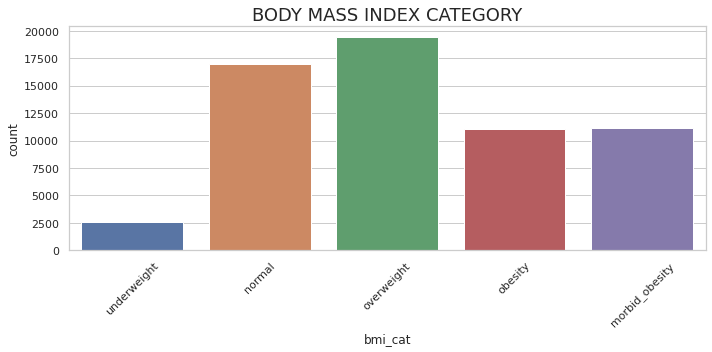

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='bmi_cat') # Count plot of Ethnicity column
plt.xticks(rotation=45)
plt.title('BODY MASS INDEX CATEGORY', fontsize=18)
plt.tight_layout()

- From the  dataset most of the patient are overweight and above
- ```27%``` of the the patient in the observation has a normal BMI while ```4%``` are underweight


> **Glasgow Coma Scale (GCS)**: Healthcare practitioners can monitor (level of conciousness) the motor responsiveness, verbal performance, and eye-opening of the patient in the form of a simple chart. The GCS is the most commonly used tool internationally for this assessment and has been translated into 30 languages. It should not, however, be confused with the Glasgow Outcome Scale (GOS), which evaluates persistent disability after brain damage.
>![output](../assets/gcs.png)

In [65]:
df['Gcs'] = df['gcs_eyes_apache']+df['gcs_motor_apache']+ df['gcs_verbal_apache']
df = df.drop(columns=['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache' ])

In [66]:
df['gcs_cat'] =pd.cut(x=df['Gcs'], bins=[2.0, 8.0, 12.0, 14.0, 16],
                     labels=['sever', 'moderate', 'mild',
                             'normal'])

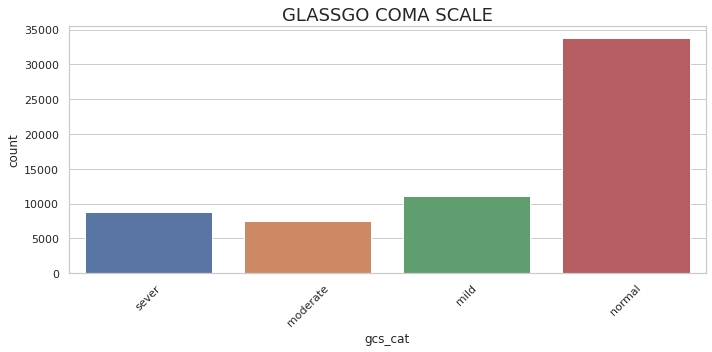

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='gcs_cat') # Count plot of gcs_cat column
plt.xticks(rotation=45)
plt.title('GLASSGO COMA SCALE', fontsize=18)
plt.tight_layout()

- ```55%``` were conscious while ```45%``` has some level of impaired consciousness

>**Age** the age columns is also categorised into ypung adult from 16 to 39. adult from 40 t0 59 and old adult from age above 60
>![output](../assets/age.png)

In [68]:
df['age_cat'] =pd.cut(x=df['age'], bins=[15.0, 39.0, 59.0, 90.0],
                     labels=['young_adult', 'adult', 'old_adult'])

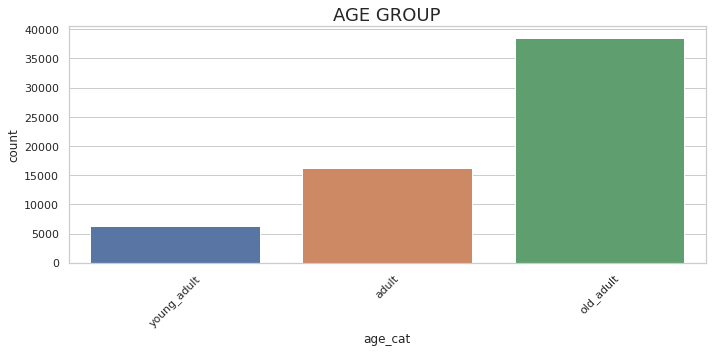

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_cat') # Count plot of age_cat column
plt.xticks(rotation=45)
plt.title('AGE GROUP', fontsize=18)
plt.tight_layout()

- ```63%``` patient from the observation are aged above 60 years old adults

**Pluse pressure and Mean arterial pressure**
>Since non-invasive monitors measure blood pressure by volume displacement or flow detection and invasive ones measure pressure impulses rather than flow, it was concluded that the pressure measured by the non-invasive monitor more accurately reflects the propulsive pressure-causing flow when inotropic pressure pulse

In [70]:
df['h1_pluse_P']=df['h1_sysbp_noninvasive_max']-df['h1_diasbp_noninvasive_max']
df=df.drop(df[df['h1_pluse_P']<0].index)

In [71]:
df['h1_pluse_P'] =pd.cut(x=df['h1_pluse_P'], bins=[3.0, 39.0, 60.0, 187.0],
                     labels=['low', 'normal', 'high'])

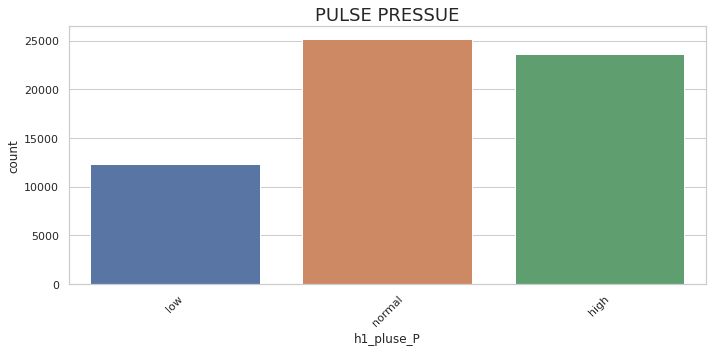

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='h1_pluse_P') # Count plot of h1_pluse_P column
plt.xticks(rotation=45)
plt.title('PULSE PRESSUE', fontsize=18)
plt.tight_layout()

In [73]:
df['heart_rate_cat'] =pd.cut(x=df['heart_rate_apache'], bins=[0, 59.0, 100.0, 200],
                     labels=['low', 'normal', 'high'])
df['map_cat'] =pd.cut(x=df['map_apache'], bins=[0, 59.0, 100.0, 201],
                     labels=['low', 'normal', 'high'])

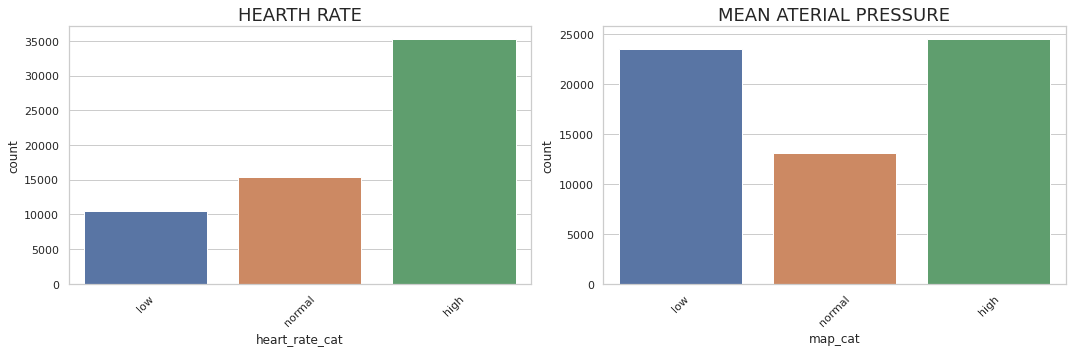

In [74]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
sns.countplot(data=df, x='heart_rate_cat', ax=ax1) # Count plot of heart_rate_apache column
plt.xticks(rotation=45)
plt.title('HEARTH RATE', fontsize=18)
plt.tight_layout()

ax2=plt.subplot(1, 2, 2)
sns.countplot(data=df, x='map_cat', ax=ax2) # Count plot of map_apache column
plt.xticks(rotation=45)
plt.title('MEAN ATERIAL PRESSURE', fontsize=18)
plt.tight_layout()

In [75]:
df.to_csv('../Datasets/clean_dataset.csv',index=False)

<a name="conclusions"></a>
    
## 5. Summary

> - The dataset was first cleaned by dropping column such ```'encounter_id', 'patient_id'``` which are identification irrelevanto the analysis. NAN values were filled with mean median depending on the distribution of the columns. some columns with a lot of missing data were also drop to prevent the generation of excess artifical data that may affect the project.

> - Both univariate and bivariate anlaysis were done to get insights about the dataset. such insight include; 1. The Observation capture almost equal propotion of male and female. 2. Most of the patients who did not survive the ICU had a had APACHE III and II diagnosis for Cardivascular disease while patients with Gyne conditons had the least death. 3. The average wait time frrom the hospital ward to the ICU was 3 hours and 4. They is a linear relationship betweeen 1hour mean blood pressure and 24hour mean blood pressure

> - Some new feature were created and analysed. created features include ```bmi_cat map_cat heart_rate_cat h1_pluse_P age_cat``` which also shows that 1. Only ```27%``` of patient had a normal BMI. 2. ```63%``` of the observation consist of individals 60 years and above. 